In [133]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow

In [134]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)

In [152]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [153]:
df.info() # Basic Information
print("\nShape: ",df.shape) # Shape of data
print("\nChecking for missing values")
df.isnull().sum()# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   9613 non-null   int64 
 1   review      9613 non-null   object
 2   Unnamed: 2  333 non-null    object
 3   Unnamed: 3  137 non-null    object
 4   Unnamed: 4  37 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
dtypes: int64(1), object(6)
memory usage: 525.8+ KB

Shape:  (9613, 7)

Checking for missing values


sentiment        0
review           0
Unnamed: 2    9280
Unnamed: 3    9476
Unnamed: 4    9576
Unnamed: 5    9608
Unnamed: 6    9611
dtype: int64

In [154]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [155]:
#Dropping unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)

In [156]:
df.to_csv('mr/sst2.csv', index=False)

In [34]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [35]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [36]:
import pandas as pd

In [37]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-sst2.csv', index=False)
test.to_csv('mr/test-sst2.csv', index=False)

In [38]:
train_df = pd.read_csv("mr/train-sst2.csv", encoding='unicode_escape', header=0)

In [39]:
train_df

,sentiment,review
0,0,it all starts to smack of a hallmark hall of f...
1,0,"too predictably , in fact ."
2,1,frei assembles a fascinating profile of a deep...
3,1,a modestly surprising movie .
4,0,"portentous and pretentious , the weight of wat..."
...,...,...
8647,0,an imponderably stilted and self-consciously a...
8648,0,the plot is so predictable and sentimental tha...
8649,0,full of the kind of obnoxious chitchat that on...
8650,0,the emotional overload of female angst irrepar...


In [40]:
train_df.iloc[0][1]

'it all starts to smack of a hallmark hall of fame , with a few four letter words thrown in that are generally not heard on television .'

In [41]:
test_df = pd.read_csv("mr/test-sst2.csv", encoding='unicode_escape', header=0)

In [42]:
test_df.shape

(961, 2)

In [43]:
test_df.head()

,sentiment,review
0,1,although laced with humor and a few fanciful t...
1,1,"the jabs it employs are short , carefully plac..."
2,0,jason x is positively anti-darwinian : nine se...
3,0,"the longer the movie goes , the worse it gets ..."
4,0,taylor appears to have blown his entire budget...


In [44]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,0,it all starts to smack of a hallmark hall of f...
1,0,"too predictably , in fact ."
2,1,frei assembles a fascinating profile of a deep...
3,1,a modestly surprising movie .
4,0,"portentous and pretentious , the weight of wat..."
5,0,"` god help us , but capra and cooper are rolli..."
6,0,the sum of all fears is almost impossible to f...
7,1,"great performances , stylish cinematography an..."
8,1,"apart from anything else , this is one of the ..."
9,1,"exhilarating , funny and fun ."


In [45]:
test_df.head()

,sentiment,review
0,1,although laced with humor and a few fanciful t...
1,1,"the jabs it employs are short , carefully plac..."
2,0,jason x is positively anti-darwinian : nine se...
3,0,"the longer the movie goes , the worse it gets ..."
4,0,taylor appears to have blown his entire budget...


In [46]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,it all starts to smack of a hallmark hall of f...
1,1,0,"too predictably , in fact ."
2,2,1,frei assembles a fascinating profile of a deep...
3,3,1,a modestly surprising movie .
4,4,0,"portentous and pretentious , the weight of wat..."


In [47]:
train_df_bert

,id,label,sentence
0,0,0,it all starts to smack of a hallmark hall of f...
1,1,0,"too predictably , in fact ."
2,2,1,frei assembles a fascinating profile of a deep...
3,3,1,a modestly surprising movie .
4,4,0,"portentous and pretentious , the weight of wat..."
...,...,...,...
8647,8647,0,an imponderably stilted and self-consciously a...
8648,8648,0,the plot is so predictable and sentimental tha...
8649,8649,0,full of the kind of obnoxious chitchat that on...
8650,8650,0,the emotional overload of female angst irrepar...


In [48]:
train_df_bert = train_df_bert.iloc[0:10000]

In [49]:
train_df_bert

,id,label,sentence
0,0,0,it all starts to smack of a hallmark hall of f...
1,1,0,"too predictably , in fact ."
2,2,1,frei assembles a fascinating profile of a deep...
3,3,1,a modestly surprising movie .
4,4,0,"portentous and pretentious , the weight of wat..."
...,...,...,...
8647,8647,0,an imponderably stilted and self-consciously a...
8648,8648,0,the plot is so predictable and sentimental tha...
8649,8649,0,full of the kind of obnoxious chitchat that on...
8650,8650,0,the emotional overload of female angst irrepar...


In [50]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,although laced with humor and a few fanciful t...
1,1,1,"the jabs it employs are short , carefully plac..."
2,2,0,jason x is positively anti-darwinian : nine se...
3,3,0,"the longer the movie goes , the worse it gets ..."
4,4,0,taylor appears to have blown his entire budget...


In [51]:
test_df_bert = test_df_bert.iloc[0:3000]

In [52]:
test_df_bert

,id,label,sentence
0,0,1,although laced with humor and a few fanciful t...
1,1,1,"the jabs it employs are short , carefully plac..."
2,2,0,jason x is positively anti-darwinian : nine se...
3,3,0,"the longer the movie goes , the worse it gets ..."
4,4,0,taylor appears to have blown his entire budget...
...,...,...,...
956,956,1,a real story about real people living their li...
957,957,1,"branagh , in his most forceful non-shakespeare..."
958,958,1,the experience of watching blobby old-school c...
959,959,0,"... too slow , too boring , and occasionally a..."


In [53]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [54]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [55]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [56]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  too predictably , in fact .
Tokenized:  ['too', 'predict', '##ably', ',', 'in', 'fact', '.']
Token IDs:  [2205, 16014, 8231, 1010, 1999, 2755, 1012]


In [57]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  78


In [58]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  66


In [59]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  it all starts to smack of a hallmark hall of fame , with a few four letter words thrown in that are generally not heard on television .
Token IDs: tensor([  101,  2009,  2035,  4627,  2000, 21526,  1997,  1037, 25812,  2534,
         1997,  4476,  1010,  2007,  1037,  2261,  2176,  3661,  2616,  6908,
         1999,  2008,  2024,  3227,  2025,  2657,  2006,  2547,  1012,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [60]:

train_df_bert.head()

,id,label,sentence
0,0,0,it all starts to smack of a hallmark hall of f...
1,1,0,"too predictably , in fact ."
2,2,1,frei assembles a fascinating profile of a deep...
3,3,1,a modestly surprising movie .
4,4,0,"portentous and pretentious , the weight of wat..."


In [61]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [62]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [63]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (8652, 60)
X_test shape: (961, 60)


In [64]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 60, 32)            5152      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60,

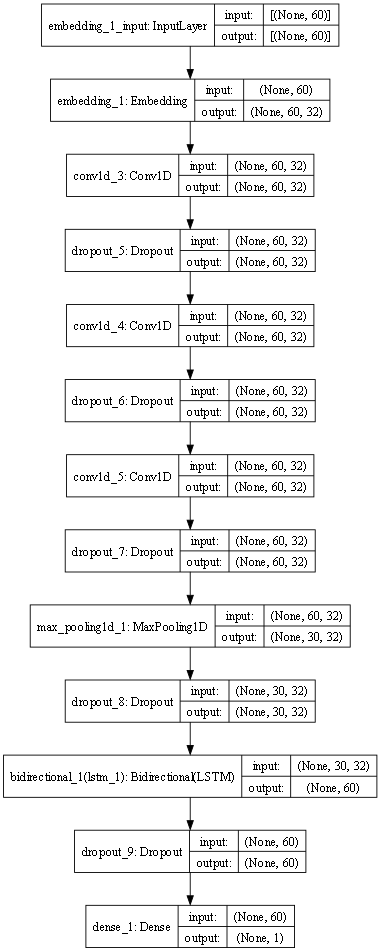

In [65]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [66]:
import keras
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
779/779 [==============================] - 37s 43ms/step - loss: 0.5920 - accuracy: 0.6599 - val_loss: 0.4806 - val_accuracy: 0.7829
Epoch 2/20
779/779 [==============================] - 33s 42ms/step - loss: 0.4027 - accuracy: 0.8233 - val_loss: 0.4680 - val_accuracy: 0.7737
Epoch 3/20
779/779 [==============================] - 34s 44ms/step - loss: 0.3209 - accuracy: 0.8614 - val_loss: 0.4844 - val_accuracy: 0.7794
Epoch 4/20
779/779 [==============================] - 34s 44ms/step - loss: 0.2545 - accuracy: 0.8953 - val_loss: 0.6876 - val_accuracy: 0.7471
Epoch 5/20
271/271 [==============================] - 4s 15ms/step - loss: 0.1876 - accuracy: 0.9360
Training Accuracy: 0.935969
Training Loss: 0.187570
31/31 [==============================] - 0s 16ms/step - loss: 0.6417 - accuracy: 0.7492
Testing Accuracy:  0.749220
Testing Loss:  0.641701


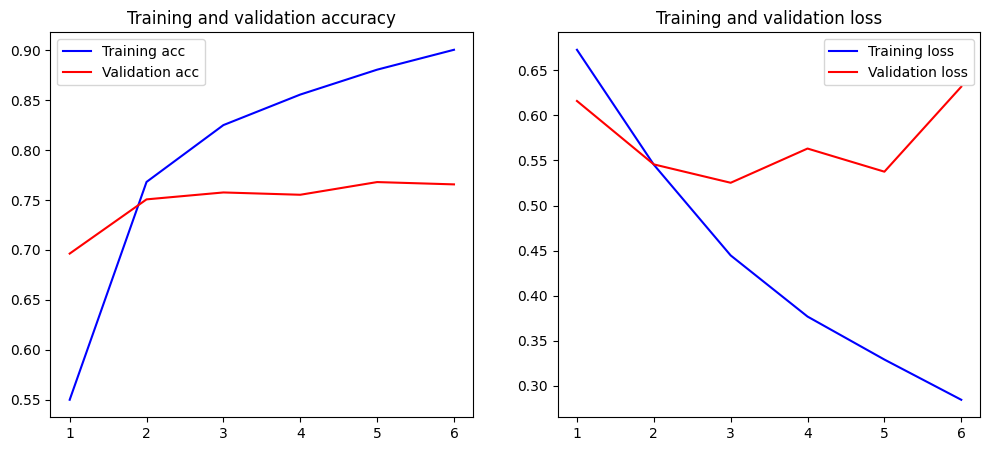

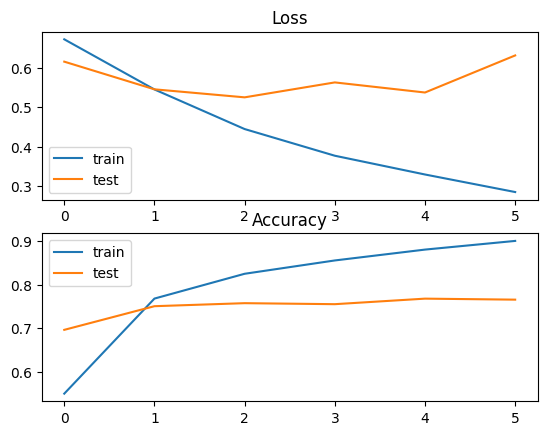

In [42]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()